In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
import matplotlib

matplotlib.rcParams['font.family'] ='gulim'

In [3]:
data_raw = pd.read_csv("test_data.csv")
data_raw = data_raw.iloc[:,1:]
data_raw = data_raw.drop([378451,378809,379999,291246,141024])

In [4]:
locationList = np.unique(data_raw.LOC)

In [49]:
predict_list = []
answer_list = []
similarityList = []
for location in locationList:
    data = data_raw.loc[(data_raw.SI>0) &(data_raw.value != 0)].loc[data_raw.LOC==location][["WS","TA","TD","HM","PV","VS","SS","SI","TS","value"]]
    answer = data.iloc[:,-1]
    data = data.iloc[:,:-1]
    model = load_model(f"./testModels/{location}_model.h5")
    predict_value = model.predict(data).reshape(-1,)
    predict_list.append(predict_value)
    answer_list.append(np.array(answer).reshape(-1,))
    similarityList.append(np.mean(np.abs(predict_value - answer)/answer))

482/482 [==============================] - 1s 1ms/step


In [50]:
[ i for i in zip(locationList,similarityList)]

[('강원', 0.4881228358859727),
 ('경기', 0.4412019110820538),
 ('경남', 0.45438797623622884),
 ('경북', 0.3995749244093154),
 ('광주', 1.0646272057312804),
 ('대구', 0.7704977641035815),
 ('대전', 14.698350046265366),
 ('부산', 1.4786737114240973),
 ('서울', 423.737105242202),
 ('세종', 2.0875703797063556),
 ('울산', 3.906837567747498),
 ('인천', 0.9988735095279114),
 ('전남', 0.7458134654855071),
 ('전북', 0.6180899160345064),
 ('제주', 1.2657418977422048),
 ('충남', 0.38466523603160446),
 ('충북', 0.4488189178065093)]

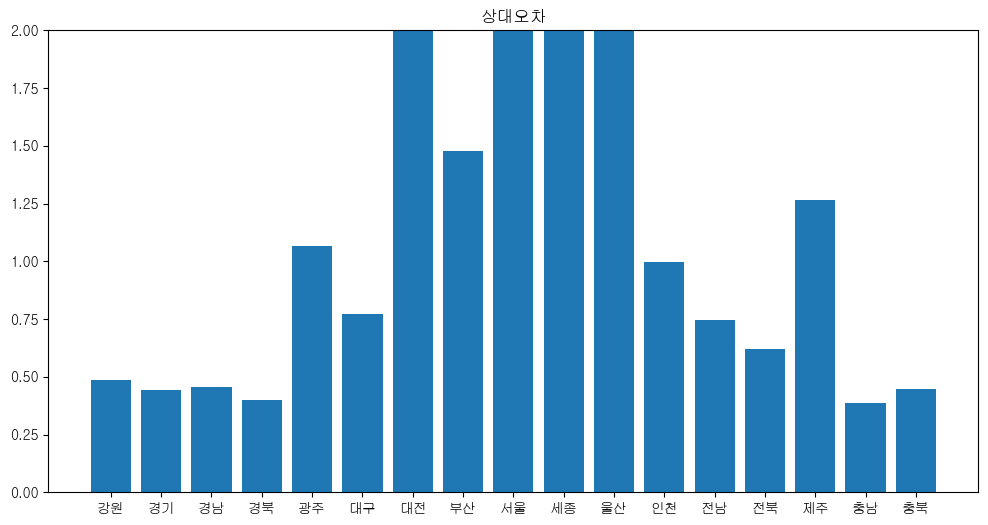

In [57]:
plt.figure(figsize=(12,6))
plt.bar(locationList,similarityList)
plt.ylim(0,2)
plt.title("상대오차")
plt.show()

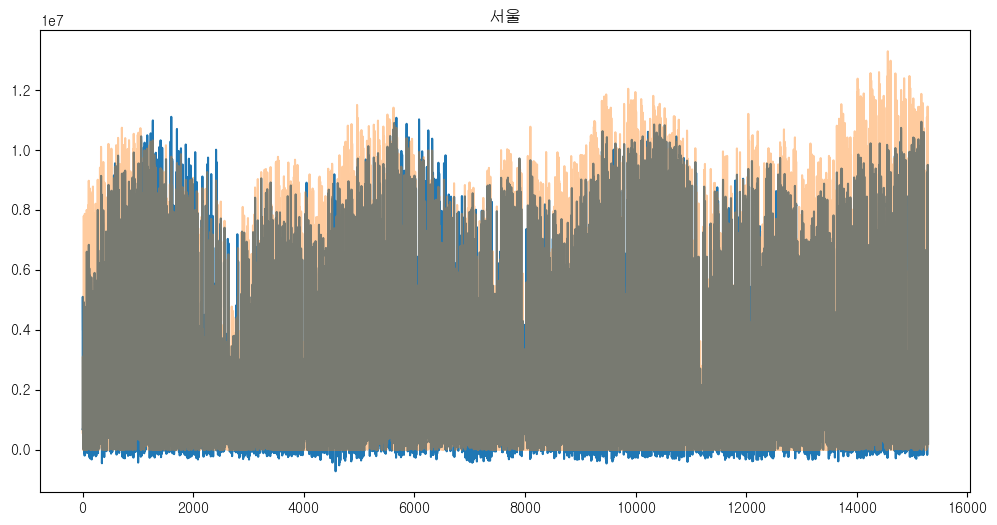

In [58]:
location_number=8
plt.figure(figsize=(12,6))
plt.plot(predict_list[location_number])
plt.plot(answer_list[location_number],alpha=0.4)
plt.title(locationList[location_number])
plt.show()

In [53]:
description=pd.DataFrame()
for idx, location in enumerate(locationList):
    description[location] = pd.DataFrame(np.abs(predict_list[idx]-answer_list[idx])/answer_list[idx]).describe()

In [60]:
description.T

,count,mean,std,min,25%,50%,75%,max
강원,15135.0,0.488123,1.193348,0.000013,0.137637,0.282741,0.466675,48.017971
경기,15065.0,0.441202,1.400049,0.000025,0.149060,0.281506,0.440647,68.752259
경남,15271.0,0.454388,1.057126,0.000028,0.126475,0.263571,0.459475,45.918311
경북,15244.0,0.399575,0.954426,0.000054,0.105913,0.228845,0.402033,43.227485
광주,16175.0,1.064627,6.806391,0.000036,0.109895,0.231291,0.499716,423.386020
대구,15654.0,0.770498,5.471369,0.000027,0.143219,0.293079,0.500555,283.612944
대전,14457.0,14.698350,252.594562,0.000022,0.147517,0.303294,0.599767,20168.923438
부산,15685.0,1.478674,9.366582,0.000032,0.162152,0.348528,0.677774,257.356778
서울,15290.0,423.737105,5283.552342,0.000043,0.143628,0.330109,0.716468,255084.000000
세종,1658.0,2.087570,12.628982,0.001008,0.094688,0.201756,0.421445,204.122566
